In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
main_train = pd.read_csv("train.csv")
main_test = pd.read_csv("test.csv")
main_target_link = pd.read_csv("sample_submission.csv")

In [2]:
main_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
main_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
main_target_link.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


<AxesSubplot:>

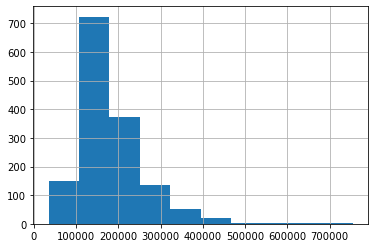

In [5]:
main_train["SalePrice"].hist()

<AxesSubplot:>

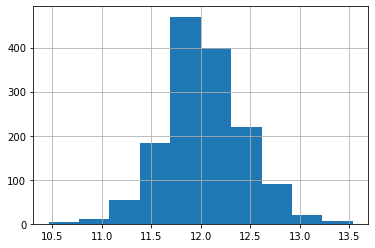

In [6]:
np.log(main_train['SalePrice']).hist()

## Test-Train data comparison

In [7]:
#Check data types count
print(main_train.dtypes.value_counts())
print(main_test.dtypes.value_counts())

object     43
int64      35
float64     3
dtype: int64
object     43
int64      26
float64    11
dtype: int64


In [8]:
correlation = main_train.corr()
main_train_corr = correlation['SalePrice'].sort_values(ascending = False)[1:][:20]
main_train_corr

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

## Functions

In [9]:
def custmDrop(df):
    res = df
    for col in df.columns:
        if (len(df[col].unique()) == 1 or df[col].isna().mean()>0.3):
            res = res.drop(col,inplace=False,axis=1)
    return res

def medianReplacer(df):
    res = df.fillna(df.mean())
    return res

def catColsNan(df):
    res = df.fillna(df.value_counts().idxmax())
    return res


In [10]:
from sklearn.feature_selection import SelectKBest, f_regression,VarianceThreshold
def SelectKbest_cstm(df,df_traget,i):
    #for i in range(2,df.shape[1],2):
    selector = SelectKBest(f_regression, k=i)
    selector_fit = selector.fit(df, df_traget)
    cols = selector_fit.get_support(indices=True)
    df_new = df.iloc[:,cols]
    return df_new

def SelectVariance_cstm(df,p):
    selector = VarianceThreshold(threshold=(p * (1 - p)))
    selector_fit = selector.fit_transform(df)
    cols = selector.get_support(indices=False)
    df_new = df.iloc[:,cols]
    return df_new

# Prepare Data

## Custom features

In [11]:
main_train.isna().mean().sort_values(ascending = False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Utilities       0.000000
dtype: float64

### PoolExist?

In [12]:
print(main_train[['PoolQC','PoolArea']].drop_duplicates())
main_train['PoolExist'] = np.where(main_train['PoolQC'].notna() | main_train['PoolArea']!=0 ,1,0)    
main_test['PoolExist'] = np.where(main_test['PoolQC'].notna() | main_test['PoolArea']!=0 ,1,0)
main_train['PoolExist'].value_counts()


     PoolQC  PoolArea
0       NaN         0
197      Ex       512
810      Fa       648
1170     Gd       576
1182     Ex       555
1298     Gd       480
1386     Fa       519
1423     Gd       738


0    1453
1       7
Name: PoolExist, dtype: int64

### FenceExist?

In [13]:
print(main_train['Fence'].drop_duplicates())
main_train['FenceExist'] = np.where(main_train['Fence'].notna(),1,0)    
main_test['FenceExist'] = np.where(main_test['Fence'].notna(),1,0)
main_train['FenceExist'].value_counts()

0        NaN
5      MnPrv
14      GdWo
15     GdPrv
129     MnWw
Name: Fence, dtype: object


0    1179
1     281
Name: FenceExist, dtype: int64

### MiscFeatureExist?

In [14]:
print(main_train['MiscFeature'].drop_duplicates())
main_train['MiscFeatureExist'] = np.where(main_train['MiscFeature'].notna(),1,0)    
main_test['MiscFeatureExist'] = np.where(main_test['MiscFeature'].notna(),1,0)
main_train['MiscFeatureExist'].value_counts()

0        NaN
5       Shed
346     Gar2
705     Othr
1386    TenC
Name: MiscFeature, dtype: object


0    1406
1      54
Name: MiscFeatureExist, dtype: int64

In [15]:
main_train_ = custmDrop(main_train)
main_test_ = custmDrop(main_test)

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')
#main_test_target = main_target_link.sort_values(by=['Id'])['SalePrice'].astype('float64')

main_train_['TotalSF'] = main_train_['TotalBsmtSF'] + main_train_['1stFlrSF'] + main_train_['2ndFlrSF']
main_test_['TotalSF'] = main_test_['TotalBsmtSF'] + main_test_['1stFlrSF'] + main_test_['2ndFlrSF']

train_rows_count = main_train_.shape[0]

main_train_.isna().mean().sort_values(ascending = False)

LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
                  ...   
BedroomAbvGr    0.000000
KitchenAbvGr    0.000000
KitchenQual     0.000000
TotRmsAbvGrd    0.000000
Id              0.000000
Length: 80, dtype: float64

## General

## Int fields

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2

#MinMax int64 fields
main_train_int = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['int64','int32'])#.fillna(np.nan)
main_train_int = medianReplacer(main_train_int)
main_train_int = main_train_int.apply(lambda x: (x-min(x))/(max(x)-min(x)))

#main_train_int_new = SelectKBest(chi2, k=10).fit_transform(main_train_int, main_train_target)
      
main_test_int = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['int64','int32'])#.fillna(np.nan)
main_test_int = medianReplacer(main_test_int)
main_test_int = main_test_int.apply(lambda x: (x-min(x))/(max(x)-min(x)))

print(main_train_int.shape, main_test_int.shape)

main_train_int_new = main_train_int#SelectKbest_cstm(main_train_int, main_train_target,25)

print(main_train_int_new.shape, main_test_int.shape)

(1460, 37) (1459, 28)
(1460, 37) (1459, 28)


## Float fields

In [17]:
#MinMax float64 fields
main_train_float = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['float64'])#.fillna(np.nan)
main_train_float = medianReplacer(main_train_float)
main_train_float = main_train_float.apply(lambda x: (x-min(x))/(max(x)-min(x)))
      
main_test_float = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['float64'])#.fillna(np.nan)
main_test_float = medianReplacer(main_test_float)
main_test_float = main_test_float.apply(lambda x: (x-min(x))/(max(x)-min(x)))
print(main_train_float.shape, main_test_float.shape)

main_train_float_new = main_train_float#SelectKbest_cstm(main_train_float, main_train_target,3)

print(main_train_float.shape, main_test_float.shape)
main_train_float_new

(1460, 3) (1459, 12)
(1460, 3) (1459, 12)


,LotFrontage,MasVnrArea,GarageYrBlt
0,0.150685,0.122500,0.936364
1,0.202055,0.000000,0.690909
2,0.160959,0.101250,0.918182
3,0.133562,0.000000,0.890909
4,0.215753,0.218750,0.909091
...,...,...,...
1455,0.140411,0.000000,0.900000
1456,0.219178,0.074375,0.709091
1457,0.154110,0.000000,0.372727
1458,0.160959,0.000000,0.454545


## Object fields

In [18]:
#OneHot object fields
main_train_obj = main_train_.sort_values(by=['Id']).loc[ : , ~main_train_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['O'])#.fillna("None")
main_test_obj = main_test_.sort_values(by=['Id']).loc[ : , ~main_test_.columns.isin(['Id', 'SalePrice'])].select_dtypes(include=['O'])#.fillna("None")

for col in main_train_obj.columns:
    catColsNan(main_train_obj[col])
    catColsNan(main_test_obj[col])

#print(SelectVariance_cstm(main_train_obj_new,0.9).shape)    
    
main_train_obj = pd.get_dummies(main_train_obj, dtype=int)#.fillna(axis=0,method='ffill')
main_test_obj = pd.get_dummies(main_test_obj, dtype=int)#.fillna(axis=0,method='ffill')

main_train_obj = custmDrop(main_train_obj)
main_test_obj  = custmDrop(main_test_obj )

print('main_train_obj_shape: ',main_train_obj.shape,'main_test_obj_shape: ', main_test_obj.shape)

main_train_obj = SelectVariance_cstm(main_train_obj,0.99)
main_test_obj = SelectVariance_cstm(main_test_obj,0.99)

#selector = SelectKBest(chi2, k=200)
#selector.fit(main_train_obj, main_train_target)
#
#cols = selector.get_support(indices=True)
main_train_obj_new = main_train_obj#SelectKbest_cstm(main_train_obj, main_train_target,200)#main_train_obj.iloc[:,cols]


print(main_train_obj_new.shape,main_train_obj.shape, main_test_obj.shape)

main_train_obj_shape:  (1460, 234) main_test_obj_shape:  (1459, 218)
(1460, 154) (1460, 154) (1459, 155)


## Сombine fields

In [19]:


dfListTrain = [main_train_int_new, main_train_float_new, main_train_obj_new]
main_train_calc = pd.concat(dfListTrain,axis=1, join="inner")

dfListTest = [main_test_int, main_test_float, main_test_obj] 
main_test_calc = pd.concat(dfListTest,axis=1, join="inner")

#Concatinate fields
test_train_concat = pd.concat(objs=[main_train_calc, main_test_calc], axis=0, join="inner")
test_train_concat = pd.get_dummies(test_train_concat, dtype=int)#.fillna(0)
test_train_concat = custmDrop(test_train_concat)
main_train_calc = test_train_concat[:train_rows_count].reset_index().drop('index',axis=1)
main_test_calc = test_train_concat[train_rows_count:].reset_index().drop('index',axis=1)

#main_train_calc = SelectKbest_cstm(main_train_calc, main_train_target,100)
main_test_calc_new = main_test_calc[list(main_train_calc.columns)]

print('main_train_calc_shape: ',main_train_calc.shape,'main_test_calc_shape: ',main_test_calc_new.shape)

main_train_calc_shape:  (1460, 188) main_test_calc_shape:  (1459, 188)


In [20]:
print(main_train_calc.isna().mean().sort_values(ascending = False).head(10))
print('\nmain_train_calc')
print(main_train_calc.dtypes.value_counts())
print('\nmain_train_int_new')
print(main_train_int_new.dtypes.value_counts())
print('\nmain_train_float_new')
print(main_train_float_new.dtypes.value_counts())
print('\nmain_train_obj_new')
print(main_train_obj_new.dtypes.value_counts())

SaleCondition_Partial    0.0
Neighborhood_CollgCr     0.0
Neighborhood_NoRidge     0.0
Neighborhood_NWAmes      0.0
Neighborhood_NAmes       0.0
Neighborhood_Mitchel     0.0
Neighborhood_MeadowV     0.0
Neighborhood_IDOTRR      0.0
Neighborhood_Gilbert     0.0
Neighborhood_Edwards     0.0
dtype: float64

main_train_calc
int32      148
float64     40
dtype: int64

main_train_int_new
float64    37
dtype: int64

main_train_float_new
float64    3
dtype: int64

main_train_obj_new
int32    154
dtype: int64


In [21]:

main_test_calc_new.isna().mean().sort_values(ascending = False)#.head(20)

SaleCondition_Partial    0.0
Neighborhood_CollgCr     0.0
Neighborhood_NoRidge     0.0
Neighborhood_NWAmes      0.0
Neighborhood_NAmes       0.0
                        ... 
ExterCond_TA             0.0
ExterCond_Gd             0.0
ExterCond_Fa             0.0
ExterQual_TA             0.0
MSSubClass               0.0
Length: 188, dtype: float64

## Calculations

In [22]:
from math import *
def scoreLogMSE(clf,target,df):
    score = sqrt(mean_squared_error(np.log(target), np.log(clf.predict(df))))
    return score
def scoreMSE(clf,target,df):
    score = sqrt(mean_squared_error(target, clf.predict(df)))
    return score

## Random Forest

In [23]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import *

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')
train, test, target_train, target_test = train_test_split(main_train_calc, np.log1p(main_train_target),test_size=0.3, shuffle=False)


#rf = RandomForestRegressor(max_features = 'sqrt', n_estimators=1000)
rf =RandomForestRegressor(criterion = 'mse', max_features = 'sqrt', 
                                  min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)


rf_fit = rf.fit(train, target_train)
predict_rf_test = rf_fit.predict(test)
print(rf_fit.score(test,target_test))

score = sqrt(mean_squared_error(target_test, rf_fit.predict(test)))
print(score)

0.8711405370890365
0.1384136764109239
Wall time: 1.5 s


## LGBM

In [24]:
import lightgbm as lgbm
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import *

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')

train, test, target_train, target_test = train_test_split(main_train_calc, np.log1p(main_train_target),test_size=0.3, shuffle=False)

clfs = [
    ('gbr', GradientBoostingRegressor(criterion = 'mse', n_estimators = 1000, loss = 'lad', max_depth = 5)),
    ('RF', RandomForestRegressor(max_features = 'auto', n_estimators = 1000,  max_depth = 5)),
    ('lgbm', lgbm.LGBMRegressor(boosting_type = 'goss',  max_depth = 5, n_estimators = 650)),  
    #('lgbm', lgbm.LGBMRegressor(boosting_type = 'dart', learning_rate = 0.2, max_depth = 3, n_estimators = 175)),
    #('xgb', xgb.XGBRegressor(booster  = 'gbtree', n_estimators = 300)),
 ]


stck = StackingRegressor(estimators = clfs, n_jobs = -1, cv = 5)#,final_estimator = lgbm.LGBMRegressor())

stck_fit = stck.fit(train, target_train)

score = scoreMSE(stck_fit,target_test,test)#sqrt(mean_squared_error(target_test, stck_fit.predict(test)))
print(score)

0.1227366611100195


In [25]:
stck_pred_test = np.expm1(stck_fit.predict(main_test_calc_new))

submission = pd.DataFrame({
        "Id": main_target_link["Id"],
        "SalePrice": stck_pred_test })
submission.to_csv('submission.csv', index=False)

## Stacking

In [30]:
from sklearn.feature_selection import f_regression
import lightgbm as lgbm
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import *
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")

xgbR1 = xgb.XGBRegressor(booster  = 'gbtree', n_estimators = 200, max_depth = 3, tree_method = 'hist',
                        subsample = 0.7, colsample_bynode = 0.7, max_bin = 384)

train, test, target_train, target_test = train_test_split(main_train_calc, np.log1p(main_train_target),test_size=0.3, shuffle=False)
    
clfs = [
    ('gbr', GradientBoostingRegressor(criterion = 'friedman_mse', max_depth = 5, n_estimators = 400)),
    ('RF', RandomForestRegressor(criterion = 'mse', max_features = 'sqrt', 
                                  min_samples_leaf = 1, min_samples_split = 2, n_estimators = 500)),
    ('lgbm', lgbm.LGBMRegressor(boosting_type = 'dart', learning_rate = 0.2, max_depth = 3, n_estimators = 400)),
    ('xgb', xgbR1), 
    ('BR', BaggingRegressor(base_estimator = xgbR1, bootstrap = False, bootstrap_features = True, 
                       n_estimators = 130, oob_score = False))
]
    
stck = StackingRegressor(estimators = clfs, n_jobs = -1, cv = 7)

stck_fit = stck.fit(train, target_train)

score = sqrt(mean_squared_error(target_test, stck.predict(test)))
MyScore = scoreMSE(stck_fit,target_test,test)
print(score,MyScore)

0.11558375327946417 0.11558375327946417


In [31]:
stck_fit = stck.fit(main_train_calc, np.log1p(main_train_target))
stck_pred_test = np.expm1(stck_fit.predict(main_test_calc_new))
submission = pd.DataFrame({
        "Id": main_target_link["Id"],
        "SalePrice": stck_pred_test })
submission.to_csv('submission.csv', index=False)

In [27]:
import numpy as np
from sklearn.linear_model import LinearRegression

main_train_target = main_train_.sort_values(by=['Id'])['SalePrice'].astype('float64')

train, test, target_train, target_test = train_test_split(main_train_calc, np.log1p(main_train_target),test_size=0.3, shuffle=False)

lin = LinearRegression()

lin_fit = lin.fit(train, target_train)

score = scoreMSE(lin_fit,target_test,test)#sqrt(mean_squared_error(target_test, stck_fit.predict(test)))
print(score)

0.15730725190999423
